# First try with normal derivative formula and wonder what went wrong

In [1]:
import math
def f(x):
#     return 3*x**2 + 2*x + 1
    return math.cos(math.radians(x))

print(f(0))

1.0


In [2]:
import sys
eps = sys.float_info.epsilon
print('Epsilon: {}'.format(eps))
def f_prime(x):
    return float(f(x + eps) - f(x))/float(eps)

Epsilon: 2.220446049250313e-16


In [3]:

cosx = [f(x) for x in range(360+1)]
derivate_cosx = [f_prime(x) for x in range(360+1)]
print(cosx[:5])
print(derivate_cosx[:5])

[1.0, 0.9998476951563913, 0.9993908270190958, 0.9986295347545738, 0.9975640502598242]
[0.0, 0.0, 0.0, 0.0, 0.0]


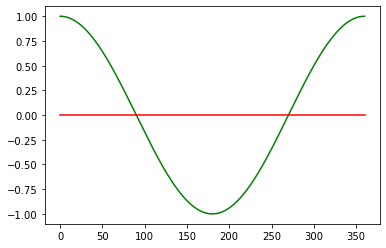

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# fig, axes = plt.subplots(figsize= (12,12), nrows= 2, ncols=1)
# axes[0].plot(range(361), cosx, color = 'Green')
# axes[1].plot(range(361), derivate_cosx, color = 'Red')
plt.plot(range(361), cosx, color = 'Green')
plt.plot(range(361), derivate_cosx, color = 'Red')
plt.show()

# Hmm, should change a bit to work

In [5]:
def f(x):
    return math.cos(math.radians(x))

eps = 1e-2

def f_prime(x):
    return float(f(x + eps) - f(x))/float(eps)

def f_prime_symmetric_derivative(x):
    return float(f(x + eps) - f(x - eps))/(2.0 * float(eps))

print('Epsilon: {}'.format(eps))
print(f(0), f_prime(0))
print(f(90), f_prime(90))
print(f(0), f_prime_symmetric_derivative(0))
print(f(90), f_prime_symmetric_derivative(90))

Epsilon: 0.01
1.0 -1.523087089783104e-06
6.123233995736766e-17 -0.017453292431354798
1.0 0.0
6.123233995736766e-17 -0.017453292431343696


[1.0, 0.9998476951563913, 0.9993908270190958, 0.9986295347545738, 0.9975640502598242]
[0.0, -0.00030460195317716376, -0.0006091111216521838, -0.0009134347489780925, -0.0012174801352349274]


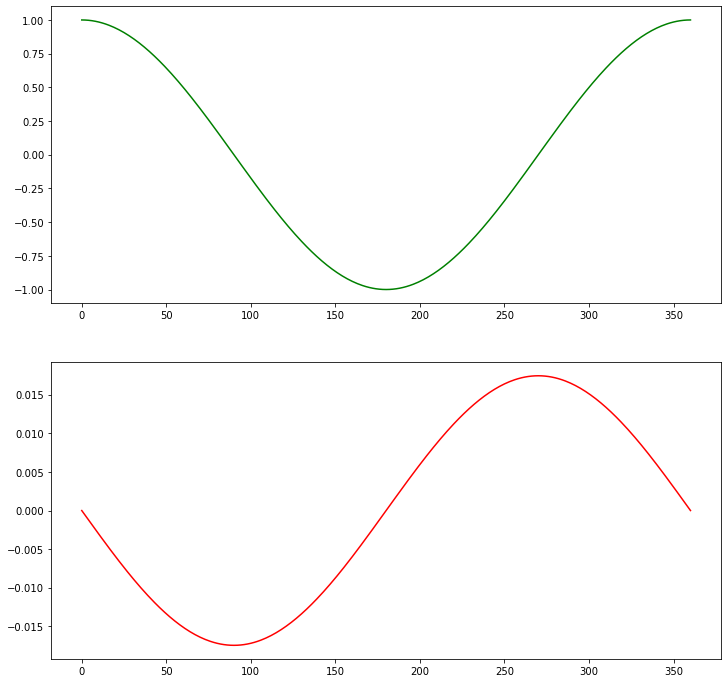

In [6]:
cosx = [f(x) for x in range(360+1)]
derivate_cosx = [f_prime_symmetric_derivative(x) for x in range(360+1)]
print(cosx[:5])
print(derivate_cosx[:5])

fig, axes = plt.subplots(figsize= (12,12), nrows= 2, ncols=1)
axes[0].plot(range(361), cosx, color = 'Green')
axes[1].plot(range(361), derivate_cosx, color = 'Red')
plt.show()

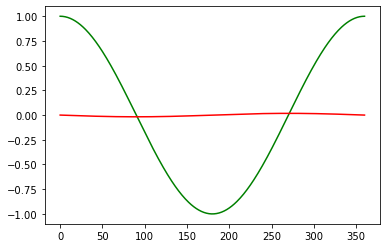

In [7]:
plt.plot(range(361), cosx, color = 'Green')
plt.plot(range(361), derivate_cosx, color = 'Red')
plt.show()

# Hmm, still not working, Try numpy

In [8]:
import numpy as np
x = np.linspace(0,3.14*2,3000)
dx = x[1] - x[0]
y = np.cos(x)
dy_dx = np.gradient(y, dx)
print(x[0], x[180], x[-1])
print(y[0], y[180], y[-1])
print(dy_dx[0], dy_dx[180], dy_dx[-1])

0.0 0.3769256418806269 6.28
1.0 0.9298005874209099 0.9999949269133752
-0.0010470152892818048 -0.3680634043477761 0.0042323094429350915


In [9]:
print(x.shape, dy_dx.shape)

(3000,) (3000,)


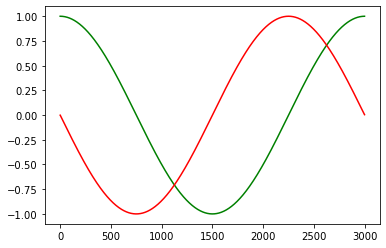

In [10]:
plt.plot(range(3000), y, color = 'Green')
plt.plot(range(3000), dy_dx, color = 'Red')
plt.show()

# using scipy

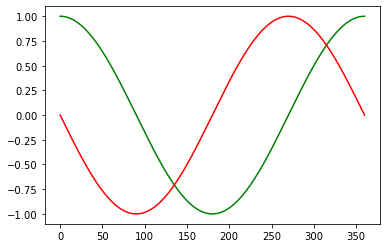

In [11]:
from scipy.misc import derivative
def f(x):
    return math.cos(x)

cosx = [f(math.radians(x)) for x in range(360+1)]
derivate_cosx = [derivative(f, math.radians(x),dx=1e-9) for x in range(361)]

plt.plot(range(361), cosx, color = 'Green')
plt.plot(range(361), derivate_cosx, color = 'Red')
plt.show()